In [12]:
import os
import scipy.io as sio
import numpy as np
from scipy.signal import resample
from scipy.interpolate import interp1d

%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
dirs = os.listdir('../../datasets/data_bak_bak/')

In [79]:
dirr = 'test_raw'
mats = os.listdir('../../datasets/data_bak_bak/' + dirr)
for mat in mats:
    data = sio.loadmat('../../datasets/data_bak_bak/' + dirr + '/' + mat)
    voltage_d = data['vd'][:, 0]
    voltage_q = data['vq'][:, 0]
    current_d = data['id'][:, 0]
    current_q = data['iq'][:, 0]
    speed = data['spd'][:, 0] * 2 * np.pi
    torque = data['trq'][:, 0]

    current_time = data['it'][:, 0]
    voltage_time = data['vt'][:, 0]

    print (mat, speed.min(), speed.max())
    v1f = interp1d(voltage_time, voltage_d)
    v2f = interp1d(voltage_time, voltage_q)
    spdf = interp1d(voltage_time, speed)
    trqf = interp1d(voltage_time, torque)
    c1f = interp1d(current_time, current_d)
    c2f = interp1d(current_time, current_q)

    current_time = current_time[:voltage_d.shape[0]]
    nvoltage_d = v1f(current_time[1:])
    nvoltage_q = v2f(current_time[1:])
    nspeed = spdf(current_time[1:])
    ntorque = trqf(current_time[1:])
    ncurrent_d = c1f(current_time[1:])
    ncurrent_q = c2f(current_time[1:])
    time = current_time[1:]

    ndata = {'voltage_d': nvoltage_d,
               'voltage_q': nvoltage_q,
               'speed': nspeed,
               'current_d': ncurrent_d,
               'current_q': ncurrent_q,
               'torque': ntorque,
               'time': time}
    sio.savemat('../../datasets/data/' + dirr + '/' + mat, ndata)
    print (nspeed.min(), nspeed.max())

LM20_TorqueSteps.mat -323.04676654879177 385.1250515585388
-323.04676654879177 385.1250515585388
LM30.mat 182.97514585498413 206.84772186645444
182.97514585498413 206.84772186645444
LM60_TroqueSteps.mat 0.047936899621426284 420.4066096799085
0.047936899623129345 420.40660967990436
LM68.mat 422.56377016287274 443.8956904944074
422.56377016287274 443.8956904944074
NoLM.mat -0.14381069886427886 630.6578514194842
-0.14381069886427886 630.6578514194842
NoLM_SpeedVariations2.mat -630.3222931221343 664.7409870503183
-630.3222931221343 664.7409870503183


In [13]:
mat = sio.loadmat('../../../datasets/RefSynthData/Data8Feb2019.mat')

In [16]:
tq = mat['Kvalv']
spd = mat['Speed']
t = mat['t']

In [31]:
tq_noise = np.random.normal(0, 0.5, tq.shape[1])
spd_noise = np.random.normal(0, 0.25, spd.shape[1])

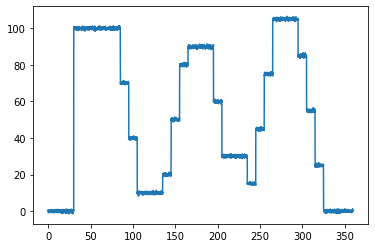

In [32]:
plt.plot(t[0], tq[0] + tq_noise)

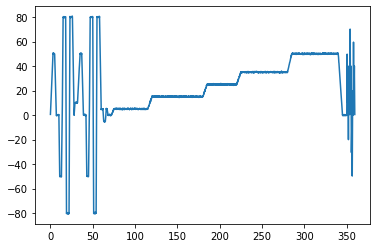

In [33]:
plt.plot(t[0], spd[0] + spd_noise)

In [34]:
sio.savemat('../../../datasets/RefSynthData/Res.mat', {'t':mat['t'], 'Speed': [spd[0] + spd_noise], 'Kvalv': [tq[0] + tq_noise]})